In [1]:
# DEC. 2022
# Pipeline by Zhilin Ning

# Load libraries
#.libPaths('/home/zlning/R/lib/')
library(scater)
library(Seurat)
library(tidyverse)
library(cowplot)
library(Matrix.utils)
library(edgeR)
library(dplyr)
library(magrittr)
library(Matrix)
library(purrr)
library(reshape2)
library(S4Vectors)
library(tibble)
library(SingleCellExperiment)
library(pheatmap)
library(apeglm)
library(png)
library(DESeq2)
library(RColorBrewer)
library(hdf5r)
library(ggpubr)
library(lme4)
library(ggthemes)
library(GEOquery) 

载入需要的程辑包：SingleCellExperiment

载入需要的程辑包：SummarizedExperiment

载入需要的程辑包：MatrixGenerics

载入需要的程辑包：matrixStats


载入程辑包：‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSd

In [4]:
options(timeout=120000000000)
options( 'download.file.method.GEOquery' = 'libcurl' )
gset <- getGEO('GSE132465', destdir=".", AnnotGPL = T, getGPL = T) 
cli<-pData(gset[[1]])

Found 1 file(s)

GSE132465_series_matrix.txt.gz

Using locally cached version: ./GSE132465_series_matrix.txt.gz

Annotation GPL not available, so will use submitter GPL instead

Using locally cached version of GPL20301 found here:
./GPL20301.soft.gz 



In [5]:
options(repr.matrix.max.cols=ncol(cli), repr.matrix.max.rows=5)
cli

title   geo_accession status                submission_date
GSM3868425 SMC01-T GSM3868425    Public on Apr 04 2020 Jun 10 2019    
GSM3868426 SMC02-T GSM3868426    Public on Apr 04 2020 Jun 10 2019    
GSM3868427 SMC03-T GSM3868427    Public on Apr 04 2020 Jun 10 2019    
⋮          ⋮       ⋮             ⋮                     ⋮              
GSM3868456 SMC09-N GSM3868456    Public on Apr 04 2020 Jun 10 2019    
GSM3868457 SMC10-N GSM3868457    Public on Apr 04 2020 Jun 10 2019    
           last_update_date type channel_count source_name_ch1        
GSM3868425 Apr 04 2020      SRA  1             SMC01_Colorectal cancer
GSM3868426 Apr 04 2020      SRA  1             SMC02_Colorectal cancer
GSM3868427 Apr 04 2020      SRA  1             SMC03_Colorectal cancer
⋮          ⋮                ⋮    ⋮             ⋮                      
GSM3868456 Apr 04 2020      SRA  1             SMC09_Normal mucosa    
GSM3868457 Apr 04 2020      SRA  1             SMC10_Normal mucosa    
           organism_ch1 characteristics_ch1 characteristics_ch1.1     
GSM3868425 Homo sapiens patient_id: SMC01   tumor stage: 2            
GSM3868426 Homo sapiens patient_id: SMC02   tumor stage: 3            
GSM3868427 Homo sapiens patient_id: SMC03   tumor stage: 3            
⋮          ⋮            ⋮                   ⋮                         
GSM3868456 Homo sapiens patient_id: SMC09   tissue type: Normal mucosa
GSM3868457 Homo sapiens patient_id: SMC10   tissue type: Normal mucosa
           characteristics_ch1.2          characteristics_ch1.3  
GSM3868425 tissue type: Colorectal cancer region: rectum         
GSM3868426 tissue type: Colorectal cancer region: rectum         
GSM3868427 tissue type: Colorectal cancer region: hepatic flexure
⋮          ⋮                              ⋮                      
GSM3868456                                                       
GSM3868457                                                       
           characteristics_ch1.4            molecule_ch1
GSM3868425 pathologic: Well differentiated  polyA RNA   
GSM3868426 pathologic: Well differentiated  polyA RNA   
GSM3868427 pathologic: Poorly differntiated polyA RNA   
⋮          ⋮                                ⋮           
GSM3868456                                  polyA RNA   
GSM3868457                                  polyA RNA   
           extract_protocol_ch1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
GSM3868425 After resection, tumor (n = 23) and non-malignant (n = 10) colon tissues were collected immediately and tissue dissociation was performed using a tumor dissociation kit (Miltenyi Biotech, Germany), according to the manufacturer’s instructions. Briefly, tissues were cut into 2-4 mm pieces and transferred to C tubes containing an enzyme mix (Enzyme H, R, and A in RPMI1640 media). Gentle MACS programs (h_tumor_01, 02, and 03) were run in a MACSmix tube rotator, with two 30-min incubation periods at 37°C between each run. The digested samples were filtered through a 70-µm strainer, purified via a Ficoll-Paque PLUS (GE healthcare. USA) gradient, and cryopreserved in cell bank (Zenoaq, Japan) before sequencing. The cryopreserved single cell dissociates were rapidly thawed, washe

In [6]:
info <- read.csv("./CRC-41588_2020_636_MOESM3_ESM.csv",head=T)

In [7]:
info

Patient Sample.type       Gender Age TNM.stage    Stage Anatomic.region
1  SMC01   Colorectal cancer F      64  T3  N0  M0   IIA   rectum         
2  SMC02   Colorectal cancer M      66  T3  N1b  M0  IIIB  rectum         
3  SMC03   Colorectal cancer F      83  T4b N2a M0   IIIC  hepatic flexure
⋮  ⋮       ⋮                 ⋮      ⋮   ⋮            ⋮     ⋮              
22 SMC24   Colorectal cancer F      48  T1  N0  M0   I     ascending      
23 SMC25   Colorectal cancer F      57  T3  N2b  M1a IVA   sigmoid        
   Left.Right.sided MSI  
1  left             MSS  
2  left             MSS  
3  right            MSI-H
⋮  ⋮                ⋮    
22 right            MSI-H
23 left             MSS  
   Pathological.subtype                                           
1  Adenocarcinoma; well differentiated                            
2  Adenocarcinoma; well differentiated                            
3  Adenocarcinoma; poorly differentiated                          
⋮  ⋮                                                              
22 Adenocarcinoma; well differentiated with mucin production (10%)
23 Adenocarcinoma; moderately differentiated                      
   No.of.mutations nearestCMS..RF. predictedCMS..RF. KRAS     BRAF     TP53    
1   157            CMS3            NA                Mutant   Wildtype Mutant  
2   105            CMS4            CMS4              Wildtype Wildtype Mutant  
3  6134            CMS1            CMS1              Wildtype Mutant   Wildtype
⋮  ⋮               ⋮               ⋮                 ⋮        ⋮        ⋮       
22 2229            CMS4            CMS4              Mutant   Wildtype Wildtype
23  165            CMS2            CMS2              Wildtype Wildtype Mutant  
   APC    SMAD4   
1  Mutant Wildtype
2  Mutant Mutant  
3  Mutant Wildtype
⋮  ⋮      ⋮       
22 Mutant Mutant  
23 Mutant Wildtype

In [8]:
# Read in the dataset
gz=gzfile('GSE132465_GEO_processed_CRC_10X_cell_annotation.txt.gz')
meta <- read.csv(gz,head=T,sep='\t',check.names=F,row.names=1)
head(meta)


Patient Class Sample  Cell_type        Cell_subtype
SMC01-T_AAACCTGCATACGCCG SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGGTCGCATAT SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGTCCCTTGCA SMC01   Tumor SMC01-T Epithelial cells CMS2        
⋮                        ⋮       ⋮     ⋮       ⋮                ⋮           
SMC01-T_AAACGGGGTATAGGTA SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAAGATGAGGCCGAAT SMC01   Tumor SMC01-T Epithelial cells CMS2

In [9]:
meta$pathologic <- cli[match(meta$Sample, cli$title),]$`pathologic:ch1`
meta$region <- cli[match(meta$Sample, cli$title),]$`region:ch1`
meta$tumorstage <- cli[match(meta$Sample, cli$title),]$`tumor stage:ch1`

In [10]:
meta.s <- cbind(meta,info[match(meta$Patient, info$Patient),c(3:18)])

In [11]:
head(meta.s)

Patient Class Sample  Cell_type        Cell_subtype
SMC01-T_AAACCTGCATACGCCG SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGGTCGCATAT SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGTCCCTTGCA SMC01   Tumor SMC01-T Epithelial cells CMS2        
⋮                        ⋮       ⋮     ⋮       ⋮                ⋮           
SMC01-T_AAACGGGGTATAGGTA SMC01   Tumor SMC01-T Epithelial cells CMS2        
SMC01-T_AAAGATGAGGCCGAAT SMC01   Tumor SMC01-T Epithelial cells CMS2        
                         pathologic          region tumorstage Gender Age
SMC01-T_AAACCTGCATACGCCG Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGGTCGCATAT Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGTCCCTTGCA Well differentiated rectum 2          F      64 
⋮                        ⋮                   ⋮      ⋮          ⋮      ⋮  
SMC01-T_AAACGGGGTATAGGTA Well differentiated rectum 2          F      64 
SMC01-T_AAAGATGAGGCCGAAT Well differentiated rectum 2          F      64 
                         TNM.stage  Stage Anatomic.region Left.Right.sided MSI
SMC01-T_AAACCTGCATACGCCG T3  N0  M0 IIA   rectum          left             MSS
SMC01-T_AAACCTGGTCGCATAT T3  N0  M0 IIA   rectum          left             MSS
SMC01-T_AAACCTGTCCCTTGCA T3  N0  M0 IIA   rectum          left             MSS
⋮                        ⋮          ⋮     ⋮               ⋮                ⋮  
SMC01-T_AAACGGGGTATAGGTA T3  N0  M0 IIA   rectum          left             MSS
SMC01-T_AAAGATGAGGCCGAAT T3  N0  M0 IIA   rectum          left             MSS
                         Pathological.subtype                No.of.mutations
SMC01-T_AAACCTGCATACGCCG Adenocarcinoma; well differentiated 157            
SMC01-T_AAACCTGGTCGCATAT Adenocarcinoma; well differentiated 157            
SMC01-T_AAACCTGTCCCTTGCA Adenocarcinoma; well differentiated 157            
⋮                        ⋮                                   ⋮              
SMC01-T_AAACGGGGTATAGGTA Adenocarcinoma; well differentiated 157            
SMC01-T_AAAGATGAGGCCGAAT Adenocarcinoma; well differentiated 157            
                         nearestCMS..RF. predictedCMS..RF. KRAS   BRAF    
SMC01-T_AAACCTGCATACGCCG CMS3            NA                Mutant Wildtype
SMC01-T_AAACCTGGTCGCATAT CMS3            NA                Mutant Wildtype
SMC01-T_AAACCTGTCCCTTGCA CMS3            NA                Mutant Wildtype
⋮                        ⋮               ⋮                 ⋮      ⋮       
SMC01-T_AAACGGGGTATAGGTA CMS3            NA                Mutant Wildtype
SMC01-T_AAAGATGAGGCCGAAT CMS3            NA                Mutant Wildtype
                         TP53   APC    SMAD4   
SMC01-T_AAACCTGCATACGCCG Mutant Mutant Wildtype
SMC01-T_AAACCTGGTCGCATAT Mutant Mutant Wildtype
SMC01-T_AAACCTGTCCCTTGCA Mutant Mutant Wildtype
⋮                        ⋮      ⋮      ⋮       
SMC01-T_AAACGGGGTATAGGTA Mutant Mutant Wildtype
SMC01-T_AAAGATGAGGCCGAAT Mutant Mutant Wildtype

In [12]:
table(as.data.frame(meta.s)$Cell_type)
table(as.data.frame(meta.s)$Cell_subtype)


         B cells Epithelial cells       Mast cells         Myeloids 
            9146            18539              187             6769 
   Stromal cells          T cells 
            5933            23115 


             CD19+CD20+ B              CD4+ T cells              CD8+ T cells 
                     3733                      7305                      6404 
                      cDC                      CMS1                      CMS2 
                      482                      1201                     10771 
                     CMS3                      CMS4       Enteric glial cells 
                     5486                        11                       305 
      gamma delta T cells              Goblet cells               IgA+ Plasma 
                      996                       139                      3546 
              IgG+ Plasma              Intermediate             Lymphatic ECs 
                     1755                       181                       108 
               Mast cells Mature Enterocytes type 1 Mature Enterocytes type 2 
                      187                       213                       131 
           Myofibroblasts                  NK cells

In [13]:
table(paste0(as.data.frame(meta.s)$Cell_type,":",as.data.frame(meta.s)$Cell_subtype))


                      B cells:CD19+CD20+ B 
                                      3733 
                       B cells:IgA+ Plasma 
                                      3546 
                       B cells:IgG+ Plasma 
                                      1755 
                           B cells:Unknown 
                                       112 
                     Epithelial cells:CMS1 
                                      1201 
                     Epithelial cells:CMS2 
                                     10771 
                     Epithelial cells:CMS3 
                                      5486 
                     Epithelial cells:CMS4 
                                        11 
             Epithelial cells:Goblet cells 
                                       139 
             Epithelial cells:Intermediate 
                                       181 
Epithelial cells:Mature Enterocytes type 1 
                                       213 
Epithelial cells:Mature Enteroc

In [15]:
gz <- gzfile('./GSE132465_GEO_processed_CRC_10X_raw_UMI_count_matrix.txt.gz')
count <- read.table(gz, head=T, check.names = F)
rownames(count) <- count$Index
count.s <- count[,-1]

In [16]:
head(count.s)

SMC01-T_AAACCTGCATACGCCG SMC01-T_AAACCTGGTCGCATAT
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        2                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAACCTGTCCCTTGCA SMC01-T_AAACGGGAGGGAAACA
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAACGGGGTATAGGTA SMC01-T_AAAGATGAGGCCGAAT
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     3                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGATGCATGGATGG SMC01-T_AAAGATGTCACGACTA
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGATGTCCGTTGCT SMC01-T_AAAGCAACAGTCGATT
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGTAGAGAGGTACC SMC01-T_AAAGTAGAGGGCTTGA
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     1                        1                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGTAGCAAGGACAC SMC01-T_AAAGTAGCAAGTAGTA
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        2                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGTAGTCAGCATGT SMC01-T_AAAGTAGTCTAACTGG
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     1                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAAGTAGTCTCGCATC SMC01-T_AAATGCCAGGATCGCA
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        0                       
⋮        ⋮                        ⋮                       
A2M-AS1  0                        0                       
A2ML1    0                        0                       
         SMC01-T_AAATGCCTCATTTGGG SMC01-T_AACACGTTCTGGCGAC
A1BG     0                        0                       
A1BG-AS1 0                        0                       
A1CF     0                        1                       
⋮        ⋮                        ⋮                     

In [17]:
dim(meta)

[1] 63689     8

In [18]:
dataan <- as(as.matrix(count.s), "dgCMatrix")

In [19]:
data.object <- CreateSeuratObject(counts = dataan, project = "test", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [20]:
table(colnames(count.s) == rownames(meta.s))


 TRUE 
63689 

In [21]:
meta.s <- as.matrix(meta.s)

In [22]:
meta.s

Patient Class  Sample  Cell_type        Cell_subtype
SMC01-T_AAACCTGCATACGCCG SMC01   Tumor  SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGGTCGCATAT SMC01   Tumor  SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGTCCCTTGCA SMC01   Tumor  SMC01-T Epithelial cells CMS2        
⋮                        ⋮       ⋮      ⋮       ⋮                ⋮           
SMC10-N_TTTATGCAGTGTCTCA SMC10   Normal SMC10-N Mast cells       Mast cells  
SMC10-N_TTTGGTTAGTGCCATT SMC10   Normal SMC10-N Mast cells       Mast cells  
                         pathologic          region tumorstage Gender Age
SMC01-T_AAACCTGCATACGCCG Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGGTCGCATAT Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGTCCCTTGCA Well differentiated rectum 2          F      64 
⋮                        ⋮                   ⋮      ⋮          ⋮      ⋮  
SMC10-N_TTTATGCAGTGTCTCA NA                  NA     NA         F      77 
SMC10-N_TTTGGTTAGTGCCATT NA                  NA     NA         F      77 
                         TNM.stage  Stage Anatomic.region Left.Right.sided
SMC01-T_AAACCTGCATACGCCG T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGGTCGCATAT T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGTCCCTTGCA T3  N0  M0 IIA   rectum          left            
⋮                        ⋮          ⋮     ⋮               ⋮               
SMC10-N_TTTATGCAGTGTCTCA T3  N0  M0 IIA   ascending       right           
SMC10-N_TTTGGTTAGTGCCATT T3  N0  M0 IIA   ascending       right           
                         MSI   Pathological.subtype                     
SMC01-T_AAACCTGCATACGCCG MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGGTCGCATAT MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGTCCCTTGCA MSS   Adenocarcinoma; well differentiated      
⋮                        ⋮     ⋮                                        
SMC10-N_TTTATGCAGTGTCTCA MSI-H Adenocarcinoma; moderately differentiated
SMC10-N_TTTGGTTAGTGCCATT MSI-H Adenocarcinoma; moderately differentiated
                         No.of.mutations nearestCMS..RF. predictedCMS..RF.
SMC01-T_AAACCTGCATACGCCG  157            CMS3            NA               
SMC01-T_AAACCTGGTCGCATAT  157            CMS3            NA               
SMC01-T_AAACCTGTCCCTTGCA  157            CMS3            NA               
⋮                        ⋮               ⋮               ⋮                
SMC10-N_TTTATGCAGTGTCTCA  987            CMS1            NA               
SMC10-N_TTTGGTTAGTGCCATT  987            CMS1            NA               
                         KRAS     BRAF     TP53     APC      SMAD4   
SMC01-T_AAACCTGCATACGCCG Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGGTCGCATAT Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGTCCCTTGCA Mutant   Wildtype Mutant   Mutant   Wildtype
⋮                        ⋮        ⋮        ⋮        ⋮        ⋮       
SMC10-N_TTTATGCAGTGTCTCA Wildtype Mutant   Wildtype Wildtype Wildtype
SMC10-N_TTTGGTTAGTGCCATT Wildtype Mutant   Wildtype Wildtype Wildtype

In [23]:
is.na(meta.s)

Patient Class Sample Cell_type Cell_subtype pathologic
SMC01-T_AAACCTGCATACGCCG FALSE   FALSE FALSE  FALSE     FALSE        FALSE     
SMC01-T_AAACCTGGTCGCATAT FALSE   FALSE FALSE  FALSE     FALSE        FALSE     
SMC01-T_AAACCTGTCCCTTGCA FALSE   FALSE FALSE  FALSE     FALSE        FALSE     
⋮                        ⋮       ⋮     ⋮      ⋮         ⋮            ⋮         
SMC10-N_TTTATGCAGTGTCTCA FALSE   FALSE FALSE  FALSE     FALSE        TRUE      
SMC10-N_TTTGGTTAGTGCCATT FALSE   FALSE FALSE  FALSE     FALSE        TRUE      
                         region tumorstage Gender Age   TNM.stage Stage
SMC01-T_AAACCTGCATACGCCG FALSE  FALSE      FALSE  FALSE FALSE     FALSE
SMC01-T_AAACCTGGTCGCATAT FALSE  FALSE      FALSE  FALSE FALSE     FALSE
SMC01-T_AAACCTGTCCCTTGCA FALSE  FALSE      FALSE  FALSE FALSE     FALSE
⋮                        ⋮      ⋮          ⋮      ⋮     ⋮         ⋮    
SMC10-N_TTTATGCAGTGTCTCA TRUE   TRUE       FALSE  FALSE FALSE     FALSE
SMC10-N_TTTGGTTAGTGCCATT TRUE   TRUE       FALSE  FALSE FALSE     FALSE
                         Anatomic.region Left.Right.sided MSI  
SMC01-T_AAACCTGCATACGCCG FALSE           FALSE            FALSE
SMC01-T_AAACCTGGTCGCATAT FALSE           FALSE            FALSE
SMC01-T_AAACCTGTCCCTTGCA FALSE           FALSE            FALSE
⋮                        ⋮               ⋮                ⋮    
SMC10-N_TTTATGCAGTGTCTCA FALSE           FALSE            FALSE
SMC10-N_TTTGGTTAGTGCCATT FALSE           FALSE            FALSE
                         Pathological.subtype No.of.mutations nearestCMS..RF.
SMC01-T_AAACCTGCATACGCCG FALSE                FALSE           FALSE          
SMC01-T_AAACCTGGTCGCATAT FALSE                FALSE           FALSE          
SMC01-T_AAACCTGTCCCTTGCA FALSE                FALSE           FALSE          
⋮                        ⋮                    ⋮               ⋮              
SMC10-N_TTTATGCAGTGTCTCA FALSE                FALSE           FALSE          
SMC10-N_TTTGGTTAGTGCCATT FALSE                FALSE           FALSE          
                         predictedCMS..RF. KRAS  BRAF  TP53  APC   SMAD4
SMC01-T_AAACCTGCATACGCCG TRUE              FALSE FALSE FALSE FALSE FALSE
SMC01-T_AAACCTGGTCGCATAT TRUE              FALSE FALSE FALSE FALSE FALSE
SMC01-T_AAACCTGTCCCTTGCA TRUE              FALSE FALSE FALSE FALSE FALSE
⋮                        ⋮                 ⋮     ⋮     ⋮     ⋮     ⋮    
SMC10-N_TTTATGCAGTGTCTCA TRUE              FALSE FALSE FALSE FALSE FALSE
SMC10-N_TTTGGTTAGTGCCATT TRUE              FALSE FALSE FALSE FALSE FALSE

In [24]:
colnames(meta.s) <- as.vector(colnames(meta.s))

In [25]:
data.object <- AddMetaData(object = data.object, metadata = as.data.frame(meta.s ))

In [26]:
data.object@meta.data

orig.ident nCount_RNA nFeature_RNA Patient Class 
SMC01-T_AAACCTGCATACGCCG SMC01-T    38052      4866         SMC01   Tumor 
SMC01-T_AAACCTGGTCGCATAT SMC01-T    33750      5268         SMC01   Tumor 
SMC01-T_AAACCTGTCCCTTGCA SMC01-T     7356      1714         SMC01   Tumor 
⋮                        ⋮          ⋮          ⋮            ⋮       ⋮     
SMC10-N_TTTATGCAGTGTCTCA SMC10-N    2079        784         SMC10   Normal
SMC10-N_TTTGGTTAGTGCCATT SMC10-N    3602       1175         SMC10   Normal
                         Sample  Cell_type        Cell_subtype
SMC01-T_AAACCTGCATACGCCG SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGGTCGCATAT SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGTCCCTTGCA SMC01-T Epithelial cells CMS2        
⋮                        ⋮       ⋮                ⋮           
SMC10-N_TTTATGCAGTGTCTCA SMC10-N Mast cells       Mast cells  
SMC10-N_TTTGGTTAGTGCCATT SMC10-N Mast cells       Mast cells  
                         pathologic          region tumorstage Gender Age
SMC01-T_AAACCTGCATACGCCG Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGGTCGCATAT Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGTCCCTTGCA Well differentiated rectum 2          F      64 
⋮                        ⋮                   ⋮      ⋮          ⋮      ⋮  
SMC10-N_TTTATGCAGTGTCTCA NA                  NA     NA         F      77 
SMC10-N_TTTGGTTAGTGCCATT NA                  NA     NA         F      77 
                         TNM.stage  Stage Anatomic.region Left.Right.sided
SMC01-T_AAACCTGCATACGCCG T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGGTCGCATAT T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGTCCCTTGCA T3  N0  M0 IIA   rectum          left            
⋮                        ⋮          ⋮     ⋮               ⋮               
SMC10-N_TTTATGCAGTGTCTCA T3  N0  M0 IIA   ascending       right           
SMC10-N_TTTGGTTAGTGCCATT T3  N0  M0 IIA   ascending       right           
                         MSI   Pathological.subtype                     
SMC01-T_AAACCTGCATACGCCG MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGGTCGCATAT MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGTCCCTTGCA MSS   Adenocarcinoma; well differentiated      
⋮                        ⋮     ⋮                                        
SMC10-N_TTTATGCAGTGTCTCA MSI-H Adenocarcinoma; moderately differentiated
SMC10-N_TTTGGTTAGTGCCATT MSI-H Adenocarcinoma; moderately differentiated
                         No.of.mutations nearestCMS..RF. predictedCMS..RF.
SMC01-T_AAACCTGCATACGCCG  157            CMS3            NA               
SMC01-T_AAACCTGGTCGCATAT  157            CMS3            NA               
SMC01-T_AAACCTGTCCCTTGCA  157            CMS3            NA               
⋮                        ⋮               ⋮               ⋮                
SMC10-N_TTTATGCAGTGTCTCA  987            CMS1            NA               
SMC10-N_TTTGGTTAGTGCCATT  987            CMS1            NA               
                         KRAS     BRAF     TP53     APC      SMAD4   
SMC01-T_AAACCTGCATACGCCG Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGGTCGCATAT Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGTCCCTTGCA Mutant   Wildtype Mutant   Mutant   Wildtype
⋮                        ⋮        ⋮        ⋮        ⋮        ⋮       
SMC10-N_TTTATGCAGTGTCTCA Wildtype Mutant   Wildtype Wildtype Wildtype
SMC10-N_TTTGGTTAGTGCCATT Wildtype Mutant   Wildtype Wildtype Wildtype

In [27]:
write_rds(data.object,
          path = "./seurat.raw.rds")    

Warning message:
“The `path` argument of `write_rds()` is deprecated as of readr 1.4.0.
ℹ Please use the `file` argument instead.”


In [28]:
data.object@assays$RNA@counts

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]



25655 x 63689 sparse Matrix of class "dgCMatrix"
                                                                                          
A1BG                 .   . . .   .  .   .   .  .   .  .  .  .   .  .  .  .   . .   .  .  .
A1BG-AS1             .   . . .   .  .   .   .  .   .  .  .  .   .  .  .  .   . .   .  .  .
A1CF                 .   2 . .   3  .   .   .  .   .  1  1  .   2  1  .  .   . .   1  .  .
A2M                  .   . . .   .  .   .   1  .   .  .  .  .   .  .  .  .   . .   .  .  .
A2M-AS1              .   . . .   .  .   .   .  .   .  .  .  .   .  .  .  .   . .   .  .  .
A2ML1                .   . . .   .  .   .   .  .   .  .  .  .   .  .  .  .   . .   .  .  .
A4GALT               .   . . .   .  .   .   1  .   .  .  .  .   .  .  .  .   . .   .  .  .
A4GNT                .   . . .   .  .   .   .  .   .  .  .  .   .  .  .  .   . .   .  .  .
AAAS                 1   1 . .   .  1   .   .  .   3  .  .  .   1  2  .  .   1 .   .  .  1
AACS                 1   . . .   .  1   1

In [29]:
'ENPP1' %in% rownames(data.object@assays$RNA@counts)

[1] TRUE

In [30]:
summary(data.object$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    201     873    1265    1880    2658    5999 

In [31]:
data.object[["percent.mt"]] <- PercentageFeatureSet(object = data.object, pattern = "^MT-")


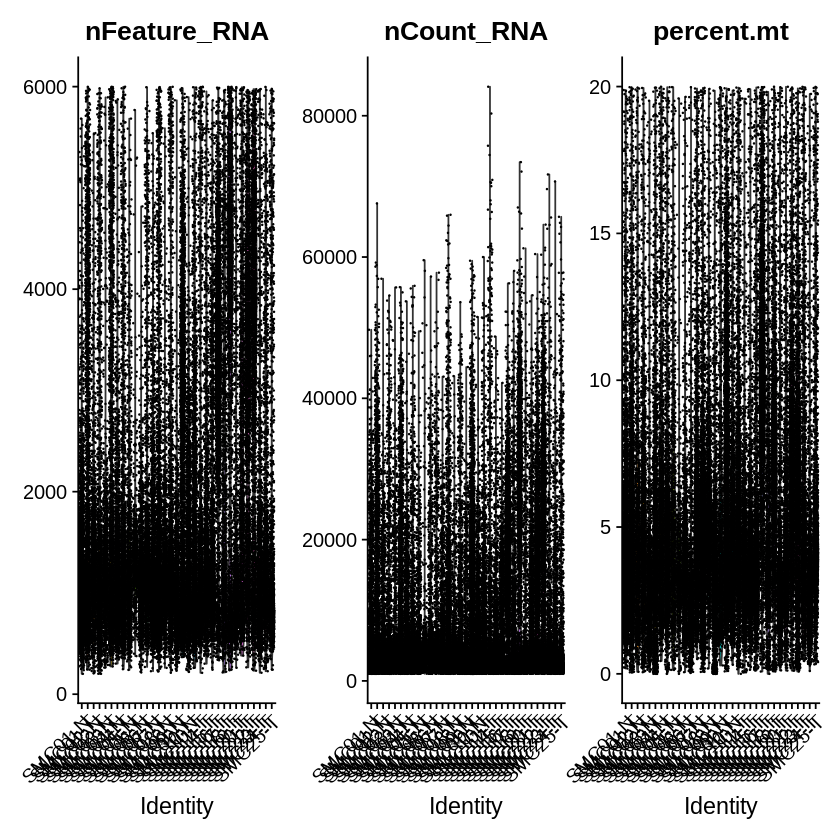

In [32]:
VlnPlot(object = data.object, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


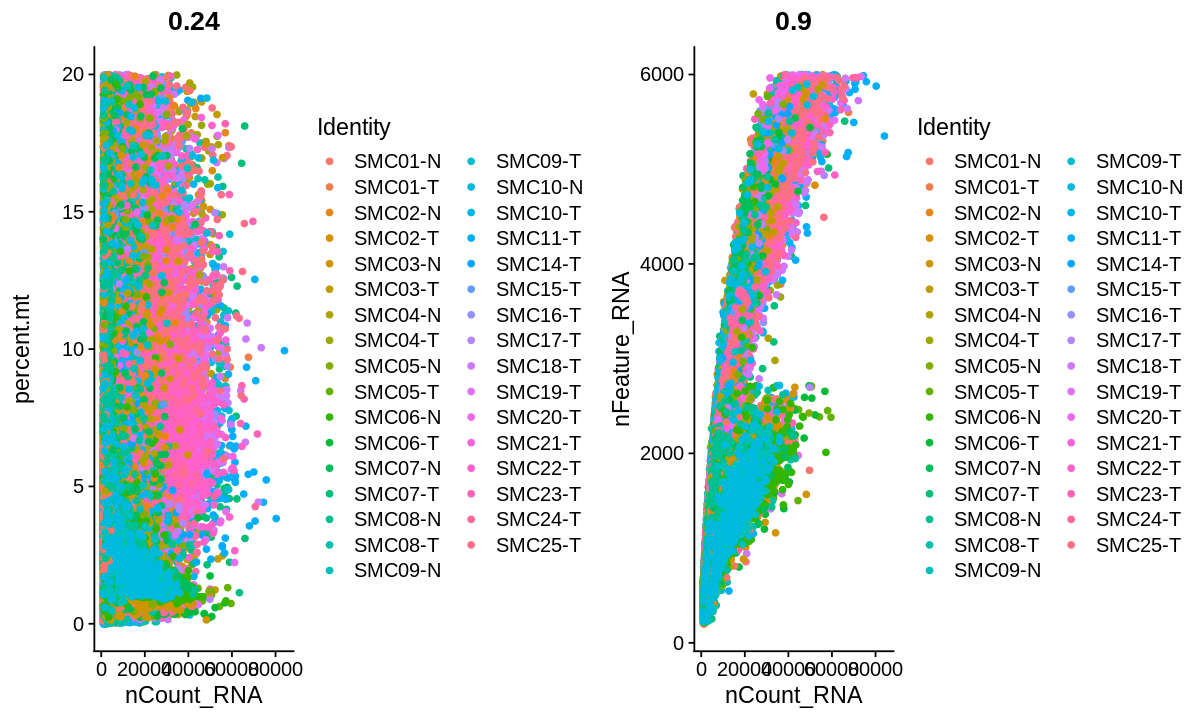

In [33]:
options(repr.plot.width=10,repr.plot.height=6)

#pdf(file="04.featureCor.pdf",width=10,height=6)
plot1 <- FeatureScatter(object = data.object, feature1 = "nCount_RNA", feature2 = "percent.mt",pt.size=1.5)
plot2 <- FeatureScatter(object = data.object, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5)
CombinePlots(plots = list(plot1, plot2))
#dev.off()

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


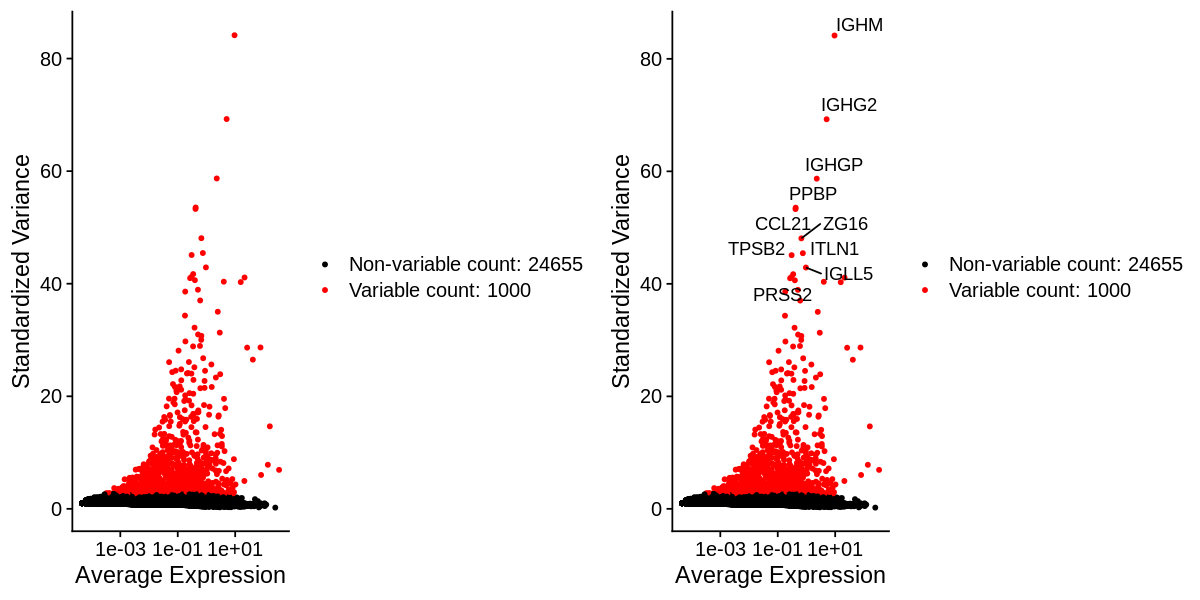

In [34]:
#seurat_integrated <- NormalizeData(object = seurat_integrated, normalization.method = "LogNormalize", scale.factor = 10000)

data.object <- FindVariableFeatures(object = data.object, selection.method = "vst", nfeatures = 1000 )
options(repr.plot.width=10,repr.plot.height=5)
top10 <- head(x = VariableFeatures(object = data.object), 10)
#pdf(file="04.featureVar.pdf",width=10,height=6)     
plot1 <- VariableFeaturePlot(object = data.object)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
#dev.off()

In [35]:
#get count data
#new.assay <- seurat_integrated
#new.assay <- NormalizeData(object = new.assay, normalization.method = "RC", scale.factor = 1e6)
#seurat_integrated@assays$RNA@counts <- new.assay@assays$RNA@data


In [36]:
#seurat_integrated@assays$RNA@counts

Centering and scaling data matrix

PC_ 1 
Positive:  CD79A, GZMA, JCHAIN, GZMK, MZB1, IGHA1, IGKC, GPR183, TNFRSF17, DERL3 
	   GZMB, IFNG, IGLC2, PRAC1, GNLY, AL928768.3, PIGR, HLA-DQB1, PHGR1, AREG 
	   BCL2A1, PRAP1, EREG, IL2RA, SPINK2, HLA-DQA1, CCL4, XCL2, JSRP1, AIF1 
Negative:  EFEMP2, FSTL1, SERPING1, COL6A2, C1S, LGALS1, IGFBP7, PTRF, SERPINF1, SPARC 
	   COL1A2, NNMT, PRKCDBP, CALD1, C1R, MMP2, AEBP1, MXRA8, PCOLCE, EMILIN1 
	   COL6A3, CERCAM, RARRES2, COL6A1, BGN, RCN3, COL3A1, LUM, HTRA1, COL5A2 
PC_ 2 
Positive:  TYROBP, FCER1G, AIF1, MS4A7, C1QA, MS4A6A, HLA-DRA, GPNMB, GPR183, C1QB 
	   C1QC, FCGR2A, BCL2A1, FCGR3A, HLA-DQA1, C1S, HLA-DPB1, PLEK, LUM, SERPINF1 
	   HLA-DPA1, DCN, FBLN1, LILRB4, MS4A4A, OLFML3, HLA-DQB1, IGSF6, CD14, IL1B 
Negative:  CRIP2, RAMP2, ESAM, CD320, BCAM, ADGRL4, PECAM1, ECSCR.1, PODXL, EGFL7 
	   S100A14, CDH5, FXYD3, KRT19, VWA1, GNG11, SLC9A3R2, CLEC14A, PLVAP, RAMP3 
	   EMCN, S100P, PCAT19, ADGRF5, CYYR1, RND1, HSPG2, CD34, TM4SF18, FLT1

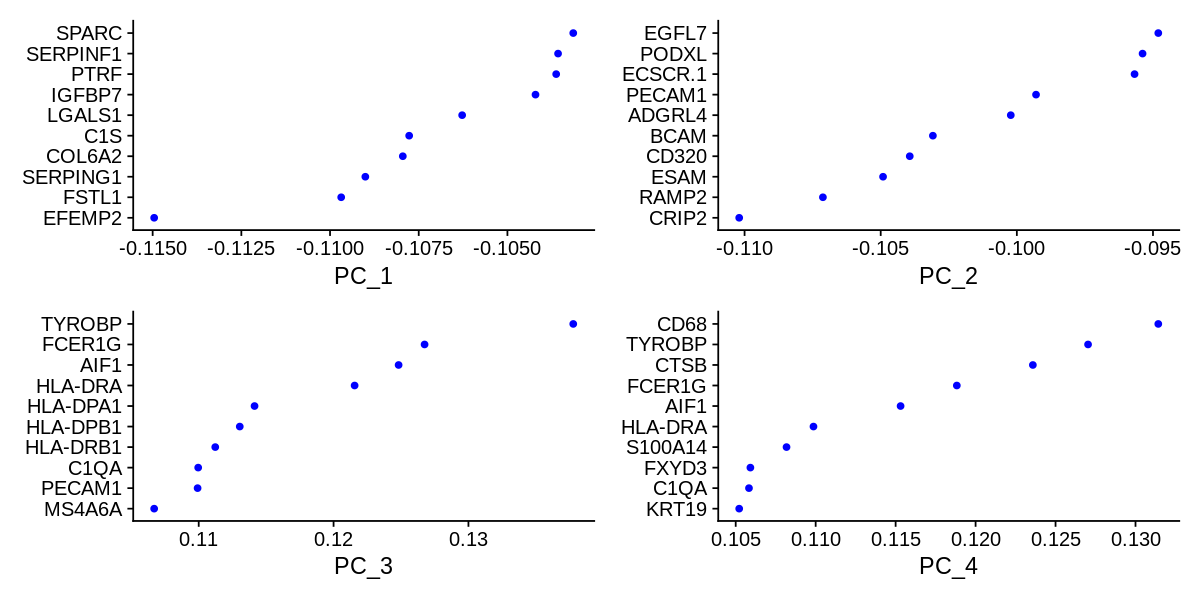

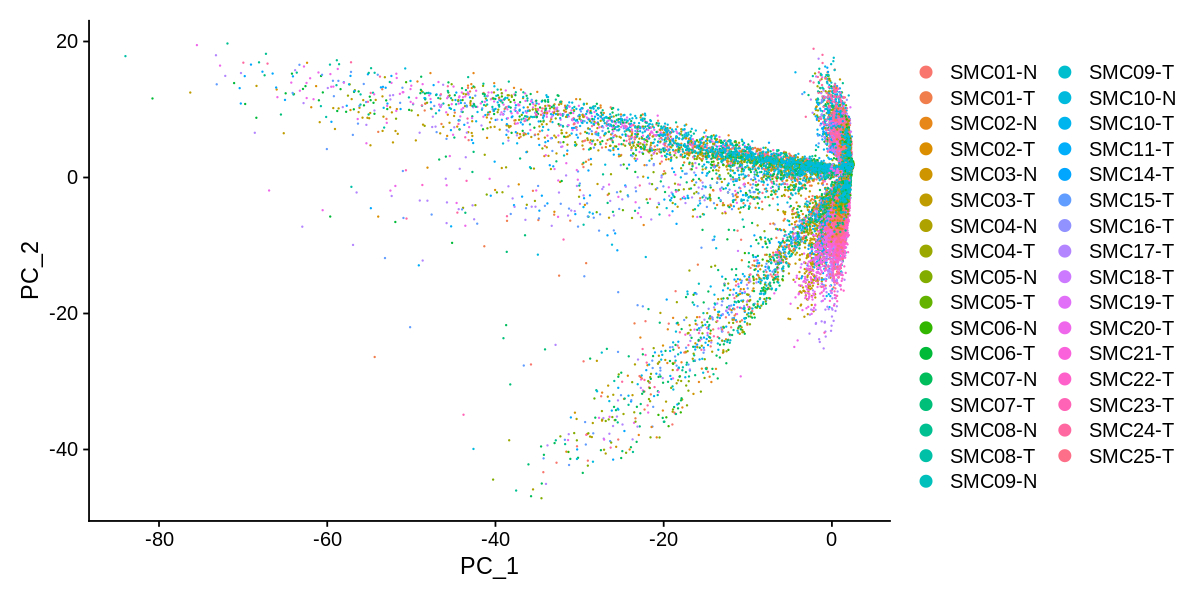

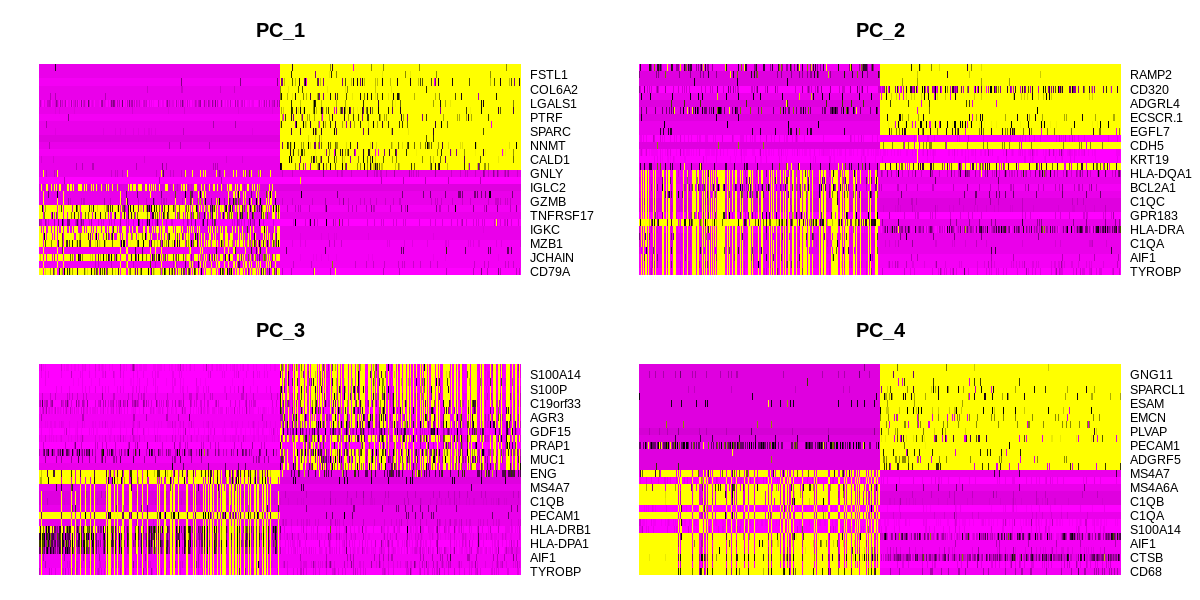

In [37]:
#seurat_integrated=ScaleData(seurat_integrated)


data.object=ScaleData(data.object)   
data.object=RunPCA(object= data.object,npcs = 30 ,pc.genes=VariableFeatures(object = seurat_integrated_1.m))     
#pdf(file="05.pcaGene.pdf",width=10,height=8)
VizDimLoadings(object = data.object, dims = 1:4, reduction = "pca",nfeatures = 10 )
#dev.off()


#pdf(file="05.PCA.pdf",width=6.5,height=6)
DimPlot(object = data.object, reduction = "pca")
#dev.off()

#pdf(file="05.pcaHeatmap.pdf",width=10,height=8)
DimHeatmap(object = data.object, dims = 1:4, cells = 500, balanced = TRUE,nfeatures = 30,ncol=2)
#dev.off()

#seurat_integrated <- JackStraw(object = seurat_integrated, num.replicate = 100)
#seurat_integrated <- ScoreJackStraw(object = seurat_integrated, dims = 1:20)
#pdf(file="05.pcaJackStraw.pdf",width=8,height=6)
#JackStrawPlot(object = seurat_integrated, dims = 1:20)
#dev.off()

PC_ 1 
Positive:  CD79A, GZMA, JCHAIN, GZMK, MZB1 
Negative:  EFEMP2, FSTL1, SERPING1, COL6A2, C1S 
PC_ 2 
Positive:  TYROBP, FCER1G, AIF1, MS4A7, C1QA 
Negative:  CRIP2, RAMP2, ESAM, CD320, BCAM 
PC_ 3 
Positive:  TYROBP, FCER1G, AIF1, HLA-DRA, HLA-DPA1 
Negative:  FXYD3, S100A14, KRT19, S100P, TSPAN1 
PC_ 4 
Positive:  CD68, TYROBP, CTSB, FCER1G, AIF1 
Negative:  RAMP2, GNG11, ADGRL4, SPARCL1, ECSCR.1 
PC_ 5 
Positive:  COL5A2, BGN, CTHRC1, COL1A1, COL5A1 
Negative:  CFD, ADH1B, GSN, PLAC9, SCARA5 
PC_ 6 
Positive:  TACSTD2, RP1-122P22.4, MUC5B, F3, RAMP1 
Negative:  BIRC5, CCNB2, CDC20, PTTG1, CCNB1 
PC_ 7 
Positive:  HTRA1, CTHRC1, MFAP2, THBS2, MMP2 
Negative:  PPP1R14A, CYGB, SEPT4, NOTCH3, RGS5 
PC_ 8 
Positive:  JCHAIN, MZB1, DERL3, IGHA1, IGKC 
Negative:  GZMA, IL1B, BCL2A1, IL1RN, GZMK 
PC_ 9 
Positive:  PRAP1, FABP1, TSPAN1, FXYD3, CEACAM1 
Negative:  BIRC5, CDKN3, PTTG1, TOP2A, CDC20 
PC_ 10 
Positive:  IL1B, BCL2A1, IL1RN, CCL3, PTGS2 
Negative:  C1QA, C1QB, C1QC, HLA-DPA1

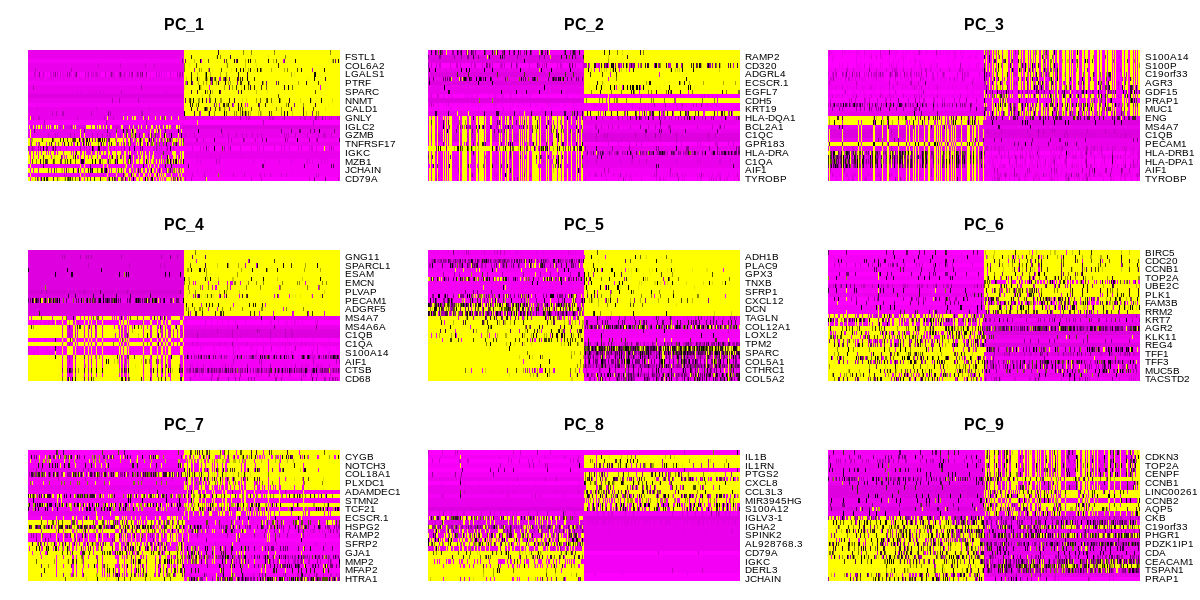

In [38]:

# Explore heatmap of PCs
#pdf('06.heatmap_of_PCs.pdf')
DimHeatmap(data.object, 
           dims = 1:9, 
           cells = 500, 
           balanced = TRUE)
#dev.off()


# Printing out the most variable genes driving PCs
print(x = data.object[["pca"]], 
      dims = 1:10, 
      nfeatures = 5)


Warning message in ElbowPlot(object = data.object, ndims = 100):
“The object only has information for 30 reductions”


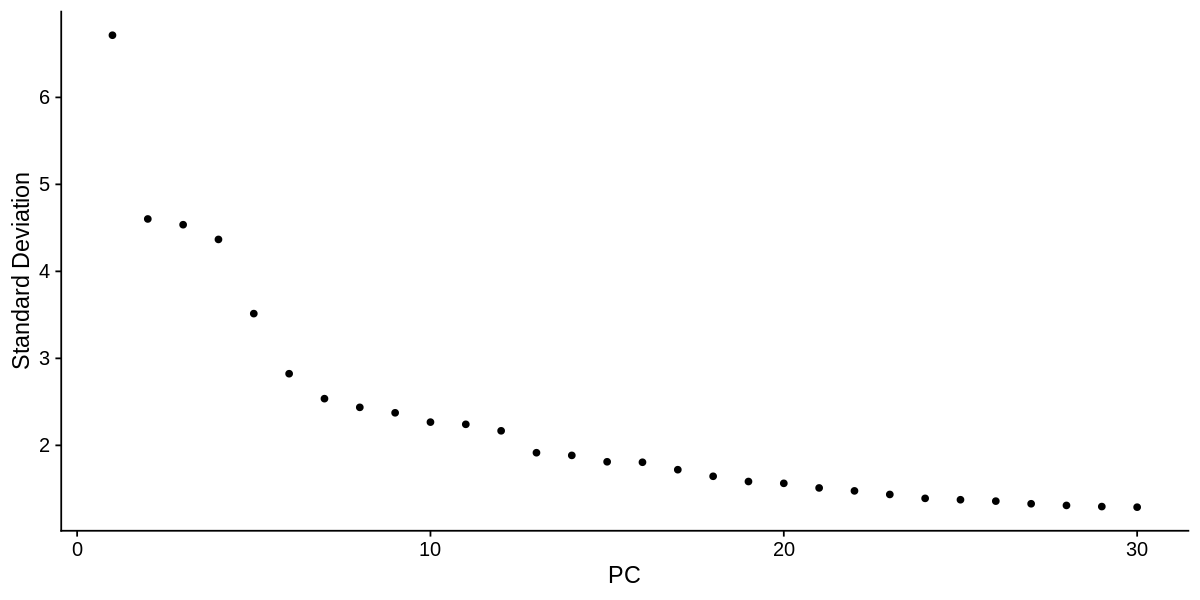

In [39]:
#pdf('07.elbowplot_of_PCs.pdf')
# Plot the elbow plot
ElbowPlot(object = data.object, 
          ndims = 100)
#dev.off()


In [40]:
#Based on this plot, we could roughly determine the majority of the variation by where the elbow occurs around PC8 - PC10

# Determine the K-nearest neighbor graph
data.object <- FindNeighbors(object = data.object, 
                                dims = 1:30)
                                
# Determine the clusters for various resolutions                                
data.object <- FindClusters(object = data.object,
                               resolution = c(0.1, 0.2, 0.3,0.4, 0.5))

# Explore resolutions
seurat_integrated_1.m@meta.data %>% 
        View()

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 63689
Number of edges: 2271007

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9742
Number of communities: 13
Elapsed time: 12 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 63689
Number of edges: 2271007

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9636
Number of communities: 19
Elapsed time: 12 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 63689
Number of edges: 2271007

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 23
Elapsed time: 14 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 63689
Number of edges: 2271007

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9487
Number of communities: 29
Elapsed time: 12 seconds
Modu

ERROR: Error in repr::mime2repr[[mime]](obj): 找不到对象'seurat_integrated_1.m'


In [41]:
data.object@meta.data

orig.ident nCount_RNA nFeature_RNA Patient Class 
SMC01-T_AAACCTGCATACGCCG SMC01-T    38052      4866         SMC01   Tumor 
SMC01-T_AAACCTGGTCGCATAT SMC01-T    33750      5268         SMC01   Tumor 
SMC01-T_AAACCTGTCCCTTGCA SMC01-T     7356      1714         SMC01   Tumor 
⋮                        ⋮          ⋮          ⋮            ⋮       ⋮     
SMC10-N_TTTATGCAGTGTCTCA SMC10-N    2079        784         SMC10   Normal
SMC10-N_TTTGGTTAGTGCCATT SMC10-N    3602       1175         SMC10   Normal
                         Sample  Cell_type        Cell_subtype
SMC01-T_AAACCTGCATACGCCG SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGGTCGCATAT SMC01-T Epithelial cells CMS2        
SMC01-T_AAACCTGTCCCTTGCA SMC01-T Epithelial cells CMS2        
⋮                        ⋮       ⋮                ⋮           
SMC10-N_TTTATGCAGTGTCTCA SMC10-N Mast cells       Mast cells  
SMC10-N_TTTGGTTAGTGCCATT SMC10-N Mast cells       Mast cells  
                         pathologic          region tumorstage Gender Age
SMC01-T_AAACCTGCATACGCCG Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGGTCGCATAT Well differentiated rectum 2          F      64 
SMC01-T_AAACCTGTCCCTTGCA Well differentiated rectum 2          F      64 
⋮                        ⋮                   ⋮      ⋮          ⋮      ⋮  
SMC10-N_TTTATGCAGTGTCTCA NA                  NA     NA         F      77 
SMC10-N_TTTGGTTAGTGCCATT NA                  NA     NA         F      77 
                         TNM.stage  Stage Anatomic.region Left.Right.sided
SMC01-T_AAACCTGCATACGCCG T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGGTCGCATAT T3  N0  M0 IIA   rectum          left            
SMC01-T_AAACCTGTCCCTTGCA T3  N0  M0 IIA   rectum          left            
⋮                        ⋮          ⋮     ⋮               ⋮               
SMC10-N_TTTATGCAGTGTCTCA T3  N0  M0 IIA   ascending       right           
SMC10-N_TTTGGTTAGTGCCATT T3  N0  M0 IIA   ascending       right           
                         MSI   Pathological.subtype                     
SMC01-T_AAACCTGCATACGCCG MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGGTCGCATAT MSS   Adenocarcinoma; well differentiated      
SMC01-T_AAACCTGTCCCTTGCA MSS   Adenocarcinoma; well differentiated      
⋮                        ⋮     ⋮                                        
SMC10-N_TTTATGCAGTGTCTCA MSI-H Adenocarcinoma; moderately differentiated
SMC10-N_TTTGGTTAGTGCCATT MSI-H Adenocarcinoma; moderately differentiated
                         No.of.mutations nearestCMS..RF. predictedCMS..RF.
SMC01-T_AAACCTGCATACGCCG  157            CMS3            NA               
SMC01-T_AAACCTGGTCGCATAT  157            CMS3            NA               
SMC01-T_AAACCTGTCCCTTGCA  157            CMS3            NA               
⋮                        ⋮               ⋮               ⋮                
SMC10-N_TTTATGCAGTGTCTCA  987            CMS1            NA               
SMC10-N_TTTGGTTAGTGCCATT  987            CMS1            NA               
                         KRAS     BRAF     TP53     APC      SMAD4   
SMC01-T_AAACCTGCATACGCCG Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGGTCGCATAT Mutant   Wildtype Mutant   Mutant   Wildtype
SMC01-T_AAACCTGTCCCTTGCA Mutant   Wildtype Mutant   Mutant   Wildtype
⋮                        ⋮        ⋮        ⋮        ⋮        ⋮       
SMC10-N_TTTATGCAGTGTCTCA Wildtype Mutant   Wildtype Wildtype Wildtype
SMC10-N_TTTGGTTAGTGCCATT Wildtype Mutant   Wildtype Wildtype Wildtype
                         percent.mt RNA_snn_res.0.1 RNA_snn_res.0.2
SMC01-T_AAACCTGCATACGCCG 12.921791  0               0              
SMC01-T_AAACCTGGTCGCATAT  8.761481  0               0              
SMC01-T_AAACCTGTCCCTTGCA 19.711800  0               0              
⋮                        ⋮          ⋮               ⋮              
SMC10-N_TTTATGCAGTGTCTCA 6.637807   2               2              
SMC10-N_TTTGGTTAGTGCCATT 4.414214   2               2              
              

In [42]:
# Assign identity of clusters
Idents(object = data.object) <- "Cell_type"

# Plot the UMAP
data.object <- RunUMAP(data.object, dims =1:30, n.neighbors = 30)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:15:44 UMAP embedding parameters a = 0.9922 b = 1.112

16:15:44 Read 63689 rows and found 30 numeric columns

16:15:44 Using Annoy for neighbor search, n_neighbors = 30

16:15:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:16:05 Writing NN index file to temp file /tmp/RtmpB7FCgg/file396d47021d333

16:16:05 Searching Annoy index using 1 thread, search_k = 3000

16:16:27 Annoy recall = 54.93%

16:16:29 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

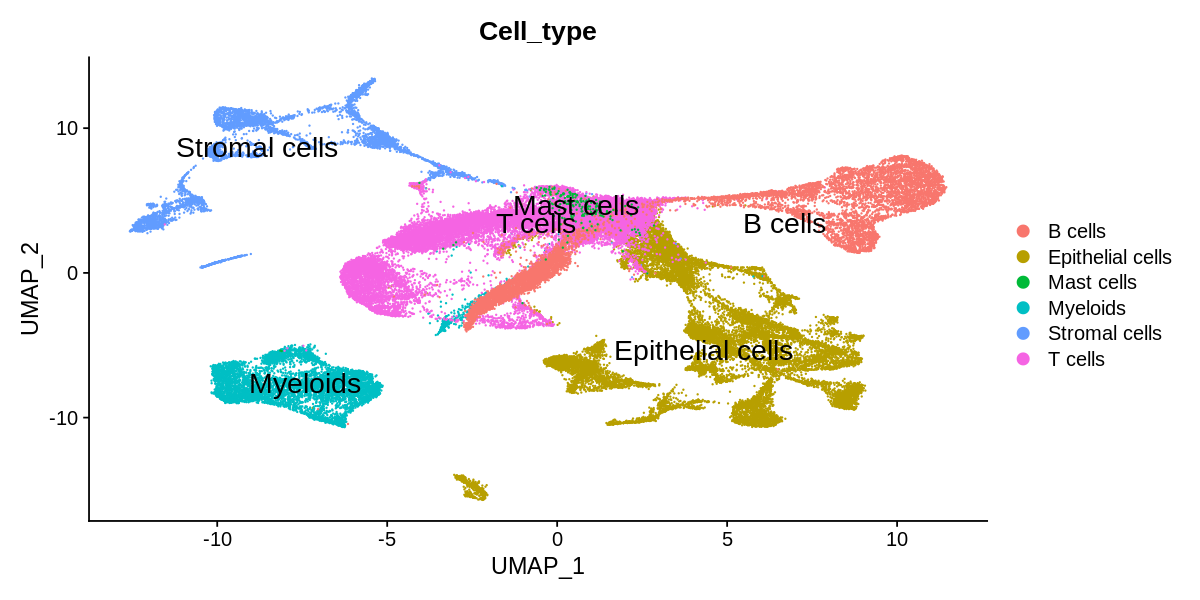

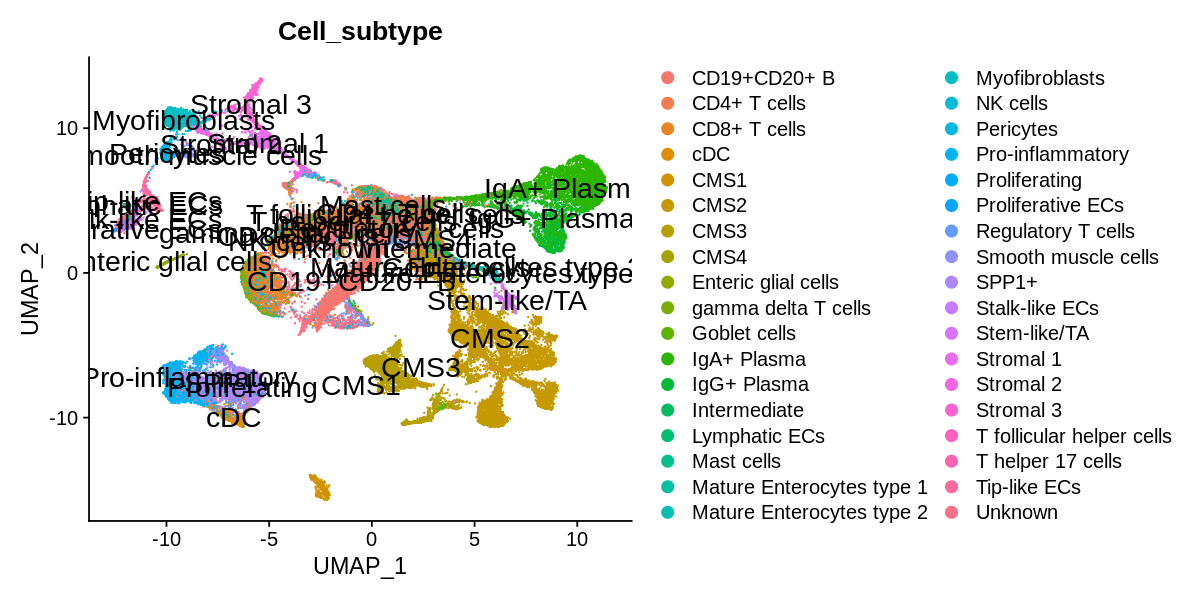

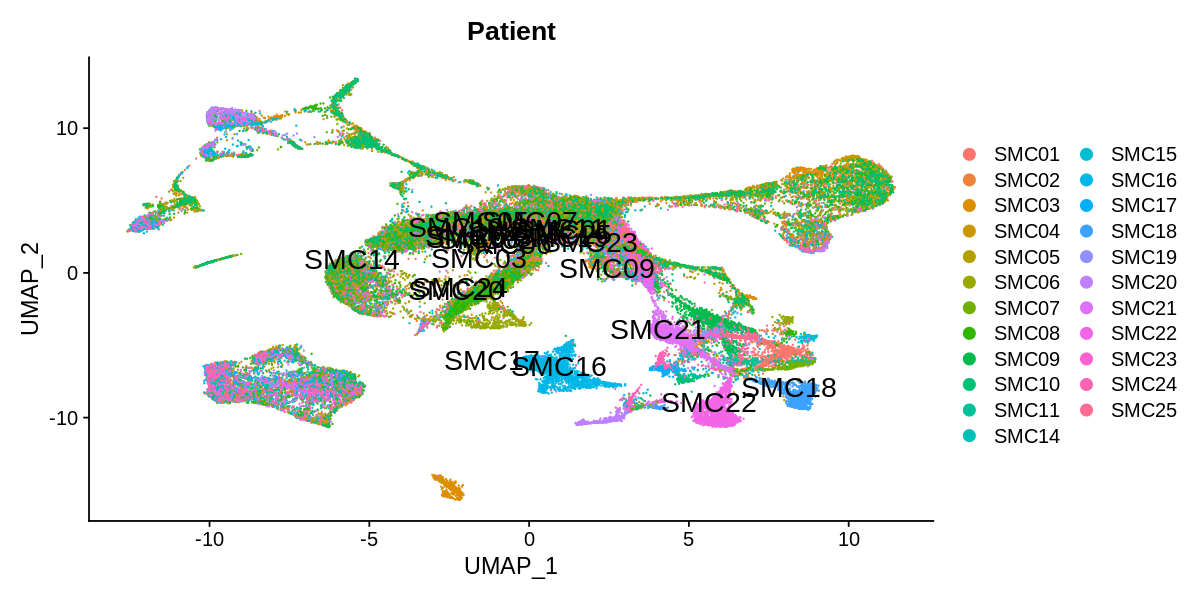

In [43]:

# Assign identity of clusters

# Plot the UMAP
DimPlot(data.object,
        reduction = "umap",
        label = TRUE,
        group.by = "Cell_type",
        label.size = 6)

DimPlot(data.object,
        reduction = "umap",
        label = TRUE,
        group.by = "Cell_subtype",
        label.size = 6)


DimPlot(data.object,
        reduction = "umap",
        label = TRUE,
        group.by = "Patient",
        label.size = 6)



In [ ]:
data.object@meta.data

In [79]:
data.object.tumor <- subset(data.object, subset = Class == "Tumor")

In [ ]:
write_rds(data.object.tumor,
          path = "./seurat.tumor.raw.rds")    

# expression plot for all cells 

In [2]:
data.object.tumor <- readRDS("./seurat.tumor.raw.rds")

In [3]:
data.object.tumor@meta.data

orig.ident nCount_RNA nFeature_RNA Patient Class
SMC01-T_AAACCTGCATACGCCG SMC01-T    38052      4866         SMC01   Tumor
SMC01-T_AAACCTGGTCGCATAT SMC01-T    33750      5268         SMC01   Tumor
SMC01-T_AAACCTGTCCCTTGCA SMC01-T     7356      1714         SMC01   Tumor
SMC01-T_AAACGGGAGGGAAACA SMC01-T     3752      1229         SMC01   Tumor
SMC01-T_AAACGGGGTATAGGTA SMC01-T    23991      3914         SMC01   Tumor
SMC01-T_AAAGATGAGGCCGAAT SMC01-T    15662      3319         SMC01   Tumor
SMC01-T_AAAGATGCATGGATGG SMC01-T    42158      5549         SMC01   Tumor
SMC01-T_AAAGATGTCACGACTA SMC01-T    16813      2990         SMC01   Tumor
SMC01-T_AAAGATGTCCGTTGCT SMC01-T     5295      1926         SMC01   Tumor
SMC01-T_AAAGCAACAGTCGATT SMC01-T    30116      4839         SMC01   Tumor
SMC01-T_AAAGTAGAGAGGTACC SMC01-T    12239      2603         SMC01   Tumor
SMC01-T_AAAGTAGAGGGCTTGA SMC01-T    14699      3035         SMC01   Tumor
SMC01-T_AAAGTAGCAAGGACAC SMC01-T     8099      2511         SMC01   Tumor
SMC01-T_AAAGTAGCAAGTAGTA SMC01-T    46890      5903         SMC01   Tumor
SMC01-T_AAAGTAGTCAGCATGT SMC01-T    22435      4834         SMC01   Tumor
SMC01-T_AAAGTAGTCTAACTGG SMC01-T    18390      3222         SMC01   Tumor
SMC01-T_AAAGTAGTCTCGCATC SMC01-T    13187      3323         SMC01   Tumor
SMC01-T_AAATGCCAGGATCGCA SMC01-T    26060      4363         SMC01   Tumor
SMC01-T_AAATGCCTCATTTGGG SMC01-T     1191       375         SMC01   Tumor
SMC01-T_AACACGTTCTGGCGAC SMC01-T    36413      4684         SMC01   Tumor
SMC01-T_AACCATGCATCACGTA SMC01-T    17245      3217         SMC01   Tumor
SMC01-T_AACCATGCATCGACGC SMC01-T    21044      3682         SMC01   Tumor
SMC01-T_AACCATGGTATAGTAG SMC01-T    31432      3824         SMC01   Tumor
SMC01-T_AACCATGTCACAGTAC SMC01-T    43380      5286         SMC01   Tumor
SMC01-T_AACCATGTCCTTGACC SMC01-T     5041      1738         SMC01   Tumor
SMC01-T_AACCGCGAGTAGCGGT SMC01-T    35117      4817         SMC01   Tumor
SMC01-T_AACCGCGCAGCTCGAC SMC01-T    24572      4100         SMC01   Tumor
SMC01-T_AACCGCGTCTAACCGA SMC01-T    27242      3835         SMC01   Tumor
SMC01-T_AACCGCGTCTTTACGT SMC01-T     8621      2122         SMC01   Tumor
SMC01-T_AACGTTGGTAAGGGAA SMC01-T    21101      4778         SMC01   Tumor
⋮                        ⋮          ⋮          ⋮            ⋮       ⋮    
SMC25-T_TGCGCAGGTCTAGGTT SMC25-T    15162      1259         SMC25   Tumor
SMC25-T_TGCTACCCATTCGACA SMC25-T     2108       757         SMC25   Tumor
SMC25-T_TGCTACCGTCCAGTAT SMC25-T     3253      1130         SMC25   Tumor
SMC25-T_TGCTACCTCGTCTGAA SMC25-T     3670      1014         SMC25   Tumor
SMC25-T_TGGGCGTCAGGGTTAG SMC25-T    11451      1554         SMC25   Tumor
SMC25-T_TGGTTAGCAGTATCTG SMC25-T     2583       817         SMC25   Tumor
SMC25-T_TGGTTCCCATAGGATA SMC25-T     5137       780         SMC25   Tumor
SMC25-T_TGTCCCAAGTGCGTGA SMC25-T     1815       682         SMC25   Tumor
SMC25-T_TGTCCCACAACACCCG SMC25-T     1041       382         SMC25   Tumor
SMC25-T_TGTGTTTAGGTGATTA SMC25-T    21140      1554         SMC25   Tumor
SMC25-T_TGTTCCGCAACTGCGC SMC25-T     1519       541         SMC25   Tumor
SMC25-T_TTAACTCGTCCGTGAC SMC25-T    24696      1792         SMC25   Tumor
SMC25-T_TTAGGCATCATCACCC SMC25-T    12230      1350         SMC25   Tumor
SMC25-T_TTAGTTCAGTGTCCCG SMC25-T     3752       998         SMC25   Tumor
SMC25-T_TTAGTTCGTAGTGAAT SMC25-T    20149      2358         SMC25   Tumor
SMC25-T_TTATGCTAGCCAACAG SMC25-T    13438      1344         SMC25   Tumor
SMC25-T_TTATGCTAGTTAACGA SMC25-T     4067      1081         SMC25   Tumor
SMC25-T_TTCGAAGTCGGTGTCG SMC25-T     2649       906         SMC25   Tumor
SMC25-T_TTCTCAACACGGCTAC SMC25-T     3852      1137         SMC25   Tumor
SMC25-T_TTGGAACAGGACTGGT SMC25-T    23634      1815         SMC25   Tumor
SMC25-T_TTGGCAATCCAATGGT SMC25-T     1737       619         SMC25   Tumor
SMC25-T_TTTACTGGTTCCACTC SMC25-T     1364       495         SMC25   Tumor
SMC25-T_TTTATGCGTTCGCTAA SMC2

In [4]:
for(i in c(4, 6:12, 14:25))
{
    print(table(data.object.tumor@meta.data[,i]))
}


SMC01 SMC02 SMC03 SMC04 SMC05 SMC06 SMC07 SMC08 SMC09 SMC10 SMC11 SMC14 SMC15 
 2791  1689  2123  1841   660  1541  4070  2089  3789  2200  1698  1749  2027 
SMC16 SMC17 SMC18 SMC19 SMC20 SMC21 SMC22 SMC23 SMC24 SMC25 
 2956  1343  1936  1540  1681  2348  2363  1639  1580  1632 

SMC01-T SMC02-T SMC03-T SMC04-T SMC05-T SMC06-T SMC07-T SMC08-T SMC09-T SMC10-T 
   2791    1689    2123    1841     660    1541    4070    2089    3789    2200 
SMC11-T SMC14-T SMC15-T SMC16-T SMC17-T SMC18-T SMC19-T SMC20-T SMC21-T SMC22-T 
   1698    1749    2027    2956    1343    1936    1540    1681    2348    2363 
SMC23-T SMC24-T SMC25-T 
   1639    1580    1632 

         B cells Epithelial cells       Mast cells         Myeloids 
            3938            17469                3             6400 
   Stromal cells          T cells 
            2736            16739 

             CD19+CD20+ B              CD4+ T cells              CD8+ T cells 
                     2049                      3980    

In [5]:
c(c("MB21D1","ENPP1","TMEM173","LRRC8A","LRRC8C","LRRC8E","LRRC8D","ABCC1"),"CXCL10","SLC19A1", "SLC46A2") %in% rownames(data.object.tumor@assays$RNA@counts)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [6]:
#ISG gene
ISG <- read.table("./ISGgene.txt",head=F)
ISG <- ISG$V1
ISG

[1] "ADAR"    "DDX60"   "HERC6"   "IRF7"    "OASL"    "PSME2"   "STAT2"  
 [8] "TRIM25"  "BST2"    "DHX58"   "IFI35"   "ISG15"   "OGFR"    "RSAD2"  
[15] "TDRD7"   "UBE2L6"  "CASP1"   "EIF2AK2" "IFIH1"   "ISG20"   "PARP12" 
[22] "RTP4"    "TRAFD1"  "USP18"   "CMPK2"   "EPSTI1"  "IFIT2"   "MX1"    
[29] "PARP14"  "SAMD9L"  "TRIM14"  "CXCL10"  "GBP4"    "IFIT3"   "NMI"    
[36] "PNPT1"   "SP110"   "TRIM21"  "HERC5"   "EPSTI1"  "CMPK2"

In [7]:
table(ISG %in% rownames(data.object.tumor@assays$RNA@counts))


TRUE 
  41 

In [8]:
data.object.tumor <- NormalizeData(object = data.object.tumor, normalization.method = "RC", scale.factor = 1e6)

In [9]:
DefaultAssay(data.object.tumor)

[1] "RNA"

In [10]:
data.object.tumor@assays$RNA@data

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]

  [[ suppressing 32 column names ‘SMC01-T_AAACCTGCATACGCCG’, ‘SMC01-T_AAACCTGGTCGCATAT’, ‘SMC01-T_AAACCTGTCCCTTGCA’ ... ]]



25655 x 47285 sparse Matrix of class "dgCMatrix"
                                                                                 
A1BG                  .          .          .         .         .         .      
A1BG-AS1              .          .          .         .         .         .      
A1CF                  .         59.25926    .         .       125.0469    .      
A2M                   .          .          .         .         .         .      
A2M-AS1               .          .          .         .         .         .      
A2ML1                 .          .          .         .         .         .      
A4GALT                .          .          .         .         .         .      
A4GNT                 .          .          .         .         .         .      
AAAS                 26.27983   29.62963    .         .         .        63.84881
AACS                 26.27983    .          .         .         .        63.84881
AADAC                 .          .          .    

In [11]:
data.object.tumor@meta.data

orig.ident nCount_RNA nFeature_RNA Patient Class
SMC01-T_AAACCTGCATACGCCG SMC01-T    38052      4866         SMC01   Tumor
SMC01-T_AAACCTGGTCGCATAT SMC01-T    33750      5268         SMC01   Tumor
SMC01-T_AAACCTGTCCCTTGCA SMC01-T     7356      1714         SMC01   Tumor
SMC01-T_AAACGGGAGGGAAACA SMC01-T     3752      1229         SMC01   Tumor
SMC01-T_AAACGGGGTATAGGTA SMC01-T    23991      3914         SMC01   Tumor
SMC01-T_AAAGATGAGGCCGAAT SMC01-T    15662      3319         SMC01   Tumor
SMC01-T_AAAGATGCATGGATGG SMC01-T    42158      5549         SMC01   Tumor
SMC01-T_AAAGATGTCACGACTA SMC01-T    16813      2990         SMC01   Tumor
SMC01-T_AAAGATGTCCGTTGCT SMC01-T     5295      1926         SMC01   Tumor
SMC01-T_AAAGCAACAGTCGATT SMC01-T    30116      4839         SMC01   Tumor
SMC01-T_AAAGTAGAGAGGTACC SMC01-T    12239      2603         SMC01   Tumor
SMC01-T_AAAGTAGAGGGCTTGA SMC01-T    14699      3035         SMC01   Tumor
SMC01-T_AAAGTAGCAAGGACAC SMC01-T     8099      2511         SMC01   Tumor
SMC01-T_AAAGTAGCAAGTAGTA SMC01-T    46890      5903         SMC01   Tumor
SMC01-T_AAAGTAGTCAGCATGT SMC01-T    22435      4834         SMC01   Tumor
SMC01-T_AAAGTAGTCTAACTGG SMC01-T    18390      3222         SMC01   Tumor
SMC01-T_AAAGTAGTCTCGCATC SMC01-T    13187      3323         SMC01   Tumor
SMC01-T_AAATGCCAGGATCGCA SMC01-T    26060      4363         SMC01   Tumor
SMC01-T_AAATGCCTCATTTGGG SMC01-T     1191       375         SMC01   Tumor
SMC01-T_AACACGTTCTGGCGAC SMC01-T    36413      4684         SMC01   Tumor
SMC01-T_AACCATGCATCACGTA SMC01-T    17245      3217         SMC01   Tumor
SMC01-T_AACCATGCATCGACGC SMC01-T    21044      3682         SMC01   Tumor
SMC01-T_AACCATGGTATAGTAG SMC01-T    31432      3824         SMC01   Tumor
SMC01-T_AACCATGTCACAGTAC SMC01-T    43380      5286         SMC01   Tumor
SMC01-T_AACCATGTCCTTGACC SMC01-T     5041      1738         SMC01   Tumor
SMC01-T_AACCGCGAGTAGCGGT SMC01-T    35117      4817         SMC01   Tumor
SMC01-T_AACCGCGCAGCTCGAC SMC01-T    24572      4100         SMC01   Tumor
SMC01-T_AACCGCGTCTAACCGA SMC01-T    27242      3835         SMC01   Tumor
SMC01-T_AACCGCGTCTTTACGT SMC01-T     8621      2122         SMC01   Tumor
SMC01-T_AACGTTGGTAAGGGAA SMC01-T    21101      4778         SMC01   Tumor
⋮                        ⋮          ⋮          ⋮            ⋮       ⋮    
SMC25-T_TGCGCAGGTCTAGGTT SMC25-T    15162      1259         SMC25   Tumor
SMC25-T_TGCTACCCATTCGACA SMC25-T     2108       757         SMC25   Tumor
SMC25-T_TGCTACCGTCCAGTAT SMC25-T     3253      1130         SMC25   Tumor
SMC25-T_TGCTACCTCGTCTGAA SMC25-T     3670      1014         SMC25   Tumor
SMC25-T_TGGGCGTCAGGGTTAG SMC25-T    11451      1554         SMC25   Tumor
SMC25-T_TGGTTAGCAGTATCTG SMC25-T     2583       817         SMC25   Tumor
SMC25-T_TGGTTCCCATAGGATA SMC25-T     5137       780         SMC25   Tumor
SMC25-T_TGTCCCAAGTGCGTGA SMC25-T     1815       682         SMC25   Tumor
SMC25-T_TGTCCCACAACACCCG SMC25-T     1041       382         SMC25   Tumor
SMC25-T_TGTGTTTAGGTGATTA SMC25-T    21140      1554         SMC25   Tumor
SMC25-T_TGTTCCGCAACTGCGC SMC25-T     1519       541         SMC25   Tumor
SMC25-T_TTAACTCGTCCGTGAC SMC25-T    24696      1792         SMC25   Tumor
SMC25-T_TTAGGCATCATCACCC SMC25-T    12230      1350         SMC25   Tumor
SMC25-T_TTAGTTCAGTGTCCCG SMC25-T     3752       998         SMC25   Tumor
SMC25-T_TTAGTTCGTAGTGAAT SMC25-T    20149      2358         SMC25   Tumor
SMC25-T_TTATGCTAGCCAACAG SMC25-T    13438      1344         SMC25   Tumor
SMC25-T_TTATGCTAGTTAACGA SMC25-T     4067      1081         SMC25   Tumor
SMC25-T_TTCGAAGTCGGTGTCG SMC25-T     2649       906         SMC25   Tumor
SMC25-T_TTCTCAACACGGCTAC SMC25-T     3852      1137         SMC25   Tumor
SMC25-T_TTGGAACAGGACTGGT SMC25-T    23634      1815         SMC25   Tumor
SMC25-T_TTGGCAATCCAATGGT SMC25-T     1737       619         SMC25   Tumor
SMC25-T_TTTACTGGTTCCACTC SMC25-T     1364       495         SMC25   Tumor
SMC25-T_TTTATGCGTTCGCTAA SMC2

In [37]:
table(data.object.tumor@meta.data$Cell_type)
table(data.object.tumor@meta.data$Cell_subtype)
table( paste0(data.object.tumor@meta.data$Cell_type, ":", data.object.tumor@meta.data$Cell_subtype))


         B cells Epithelial cells       Mast cells         Myeloids 
            3938            17469                3             6400 
   Stromal cells          T cells 
            2736            16739 


             CD19+CD20+ B              CD4+ T cells              CD8+ T cells 
                     2049                      3980                      4647 
                      cDC                      CMS1                      CMS2 
                      353                      1201                     10771 
                     CMS3                      CMS4       Enteric glial cells 
                     5486                        11                        23 
      gamma delta T cells               IgA+ Plasma               IgG+ Plasma 
                      219                       180                      1661 
            Lymphatic ECs                Mast cells            Myofibroblasts 
                       28                         3                      1146 
                 NK cells                 Pericytes          Pro-inflammatory 
                      948                       353                      2325 
            Proliferating         Proliferative ECs


             B cells:CD19+CD20+ B               B cells:IgA+ Plasma 
                             2049                               180 
              B cells:IgG+ Plasma                   B cells:Unknown 
                             1661                                48 
            Epithelial cells:CMS1             Epithelial cells:CMS2 
                             1201                             10771 
            Epithelial cells:CMS3             Epithelial cells:CMS4 
                             5486                                11 
            Mast cells:Mast cells                      Myeloids:cDC 
                                3                               353 
        Myeloids:Pro-inflammatory            Myeloids:Proliferating 
                             2325                               165 
                   Myeloids:SPP1+                  Myeloids:Unknown 
                             3096                               461 
Stromal cells:Enteric glial cells

In [15]:
data.object.tumor.t <- subset(data.object.tumor, subset = Cell_type %in% c("Epithelial cells","Stromal cells"))
data.object.tumor.dc <- subset(data.object.tumor, subset = Cell_subtype %in% c("cDC"))

#seurat_integrated_2.t <- subset(seurat_integrated_2, subset = cluster %in% c("Endocrine cells","Fibroblasts"))

In [71]:
table(res$Patient)


SMC01 SMC02 SMC03 SMC04 SMC05 SMC06 SMC07 SMC08 SMC09 SMC10 SMC11 SMC14 SMC15 
 1256   488  1021   486    30   277   783   490  1948   688   387   502   644 
SMC16 SMC17 SMC18 SMC19 SMC20 SMC21 SMC22 SMC23 SMC24 SMC25 
 2750   725  1532   425   921  1734  1925   695   395   456 

`summarise()` has grouped output by 'Group', 'Patient'. You can override using the `.groups` argument.


[1] 31.46336
[1] 1


`geom_smooth()` using formula = 'y ~ x'


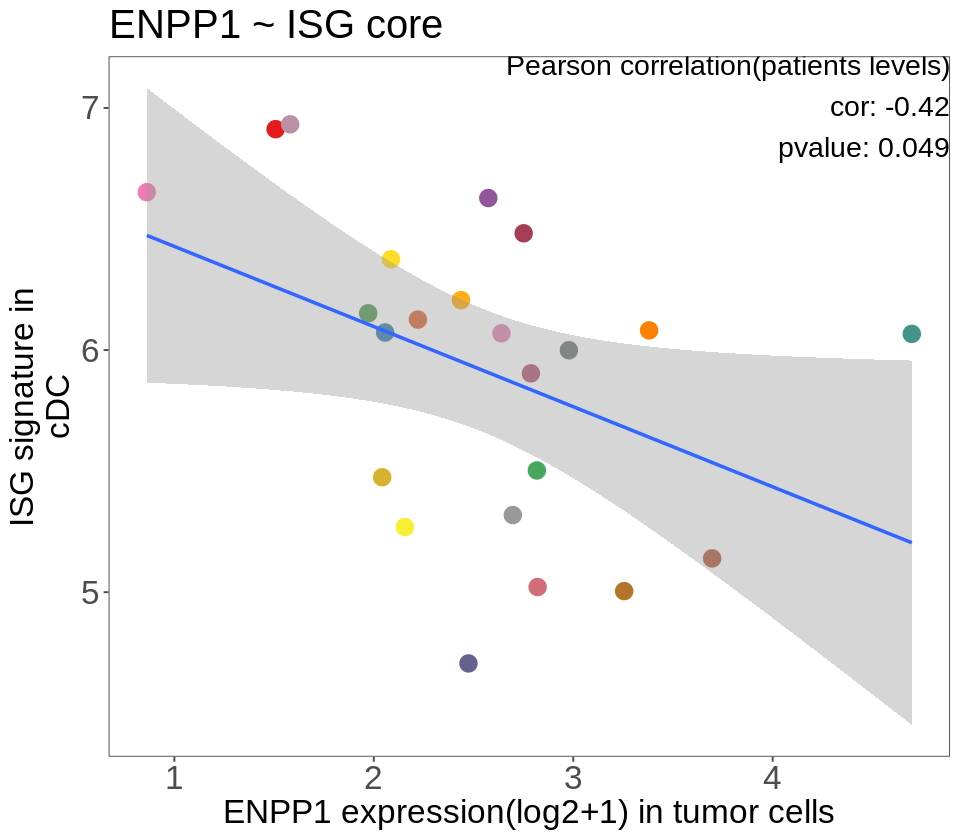

In [19]:
options(repr.plot.width=8,repr.plot.height=7,warn = -1)


#seurat_integrated_antiPD1 <- scRNA.1 #subset(x = seurat_integrated, subset = Response == "SD" | Response == "PR")
#seurat_integrated_antiPD1_cell <- seurat_integrated_antiPD1 #subset(seurat_integrated_antiPD1,idents = c(celltype))



#isg.exp <- apply(t(as.data.frame(seurat_integrated_antiPD1_cell@assays$RNA@data[unique(ISG),])),1,mean)


res <- data.frame(
            Group = data.object.tumor.t$Class,
            Patient = data.object.tumor.t$Patient,
            exp=as.numeric(data.object.tumor.t@assays$RNA@data["ENPP1",]),
            celltype = data.object.tumor.t$Cell_type)

#res <- subset(res, subset = celltype %in% c("CAFs", "Cancer Epithelial", "PVL", "Normal Epithelial"))

#res <- subset(res, subset = celltype %in% c("CAFs", "Cancer Epithelial", "PVL"))
res$celltype_1 <- "Tumor cells"




isg.exp <- apply(t(as.data.frame(data.object.tumor.dc@assays$RNA@data[unique(ISG),])),1,mean)

res.1 <- data.frame(
            Group = data.object.tumor.dc$Class,
            Patient = data.object.tumor.dc$Patient,
            exp=isg.exp,
            celltype = data.object.tumor.dc$Cell_subtype)



#res.1 <- subset(res.1, subset = celltype %in% celltype_myeloid_1)
res.1$celltype_1 <- res.1$celltype

res <- rbind(res,res.1)

#dat.s <- subset(res,subset = exp != 0)
dat.s <- res

dat.s.1 <- dat.s %>% dplyr::group_by(Group,Patient,celltype_1) %>% dplyr::summarise(mean_exp = mean(exp)) %>% ungroup()
dat.s.1.m <- melt(dat.s.1,id.var = c('Group','Patient','celltype_1'))
#dat.s.1.m$Group <- factor(dat.s.1.m$Group, levels = c( 'peritumoral' ,'tumor'))

dat.s.1.m.s <- spread(dat.s.1.m, celltype_1,value)

#head(dat.s)
ylim1<- boxplot.stats(dat.s$exp[dat.s$exp!= 0])$stats[2]
print(ylim1)
#my_comparisons <- list(c('Normal','Tumor'))

ylim2 <- 130

colourCount = length(unique(dat.s$Patient))
getPalette = colorRampPalette(brewer.pal(9, "Set1"))

#print(dat.s.1.m)
#print(dat.s.2.m.p)

for(i in 4:(ncol(dat.s.1.m.s)-1)){
re.tt = tryCatch(
     {
        a <- cor.test(log2(dat.s.1.m.s$`Tumor cells`+1), log2(dat.s.1.m.s[,i] +1)) # exp plot
        data.frame(cor = as.character(round(a$estimate,2)), pvalue = as.character(format.pval(a$p.value, digits = 2)))

      }, error = function(e){
         data.frame(cor = "NA", pvalue = "NA")
      }, finnaly = {
    print(1) #是啥都行。我用来输出循环信息
      }
   )
p <- ggplot(dat.s.1.m.s, 
       aes(x=log2(`Tumor cells`+1), y = log2(dat.s.1.m.s[,i] +1)))+  # Create ggplot without outliers
  #geom_boxplot(aes(color = Patient)) +#+#outlier.shape = NA)# +
 #geom_jitter(aes(color = Patient), width =0.2,size=2.5)+
    geom_point(aes(color =  Patient,size = 5))+ geom_smooth(method = "lm")+
 #scale_shape_manual(values = c(2))+
 scale_color_manual(values = colorRampPalette(brewer.pal(12, "Set1"))(colourCount)) +
#geom_line(aes(group=Patient), color="black")+#, alpha=0.8) +
#coord_cartesian(ylim = c(0,ylim2))+
  #coord_cartesian(ylim = quantile(as.numeric(value), c(0.1, 0.9)))
 # scale_fill_manual(values = colorRampPalette(brewer.pal(12, "Dark1"))(colourCount)) +
#stat_boxplot(geom="errorbar",width=0.15,aes(color=response))+
#geom_boxplot(varwidth = TRUE)+

#facet_wrap(.~Group ,scales = "free", drop = F)+

geom_text(data=re.tt,aes(x = Inf, y = Inf,label=paste0("Pearson correlation(patients levels)\ncor: ",
                                                       cor, "\n",
                                                       "pvalue: ",
                                                       pvalue)
                                                          ),
                               inherit.aes = FALSE,hjust ="inward", vjust ="inward", size = 6)+

#geom_text(data=dat.s.2.m.p,aes(x = Inf, y = Inf,label=paste0("All cells Wilconxon: ",as.character(format.pval(p.value, digits = 2)))),
#                               inherit.aes = FALSE,hjust ="inward", vjust ="inward")+
    
    

  #theme_classic() +
#theme_bw()+
#theme_par()+
theme_few()+
    labs(x="ENPP1 expression(log2+1) in tumor cells", y= paste0("ISG signature in\n",colnames(dat.s.1.m.s)[i])) +

    ggtitle(paste0("ENPP1 ~ ISG core"))+
 theme(legend.position="none")+
  #theme(legend.position="none")+
  #scale_y_continuous(expand = c(0.0,0.0),sec.axis = sec_axis(~ . * 1.0, name = 'XJU (DAF)'))+
  #scale_y_continuous(expand = c(0,40000),sec.axis = sec_axis(~ . * 1.0, name = ''))+
  #scale_x_continuous(limits = c(0, 40000))+
  #scale_y_continuous(limits = c(0, 40000))+
  #xlim(0, 2500) + ylim(0, 2500)+
  theme(panel.grid = element_blank())+
    theme(axis.text.x = element_text(size = 20,angle = 0,hjust = 0.5), axis.text.y = element_text(size = 20)) +
    theme(axis.title.x = element_text(size = 20), axis.title.y = element_text(size = 20))+ 
    theme(title = element_text(size = 20))+
 theme(strip.text.x = element_text(size = 20), strip.text.y = element_text(size = 20))

#scale_x_continuous(expand = c(0.0,0.0))
#stat_compare_means(comparisons = my_comparisons)#+#不同组间的比较
#stat_compare_means(label.x = 1.2)
    


print(p)

} 